## BINANCE COIN PRIZE PREDICTION

In [2]:
import pandas as pd
Binance_data = pd.read_csv("BINANCE_DATA.csv")
Binance_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2018,8.629530,8.700570,7.959220,8.414610,8.414610,66422800
1,02-01-2018,8.457700,9.122590,8.217180,8.837770,8.837770,104789000
2,03-01-2018,8.770140,9.580780,8.529180,9.535880,9.535880,108852000
3,04-01-2018,9.445840,9.538490,8.854130,9.213990,9.213990,158819008
4,05-01-2018,9.145680,16.717699,9.094680,14.917200,14.917200,341504992
...,...,...,...,...,...,...,...
2246,25-02-2024,381.742615,390.450104,378.128571,388.551727,388.551727,1324081579
2247,26-02-2024,388.535004,404.440094,382.256866,401.643890,401.643890,2011146388
2248,27-02-2024,401.643890,403.740051,390.917877,394.995636,394.995636,1750697179
2249,28-02-2024,394.951721,427.046814,394.661072,415.771606,415.771606,2323818531


In [3]:
Data = Binance_data.reset_index()["Close"]
Data.head()

0     8.41461
1     8.83777
2     9.53588
3     9.21399
4    14.91720
Name: Close, dtype: float64

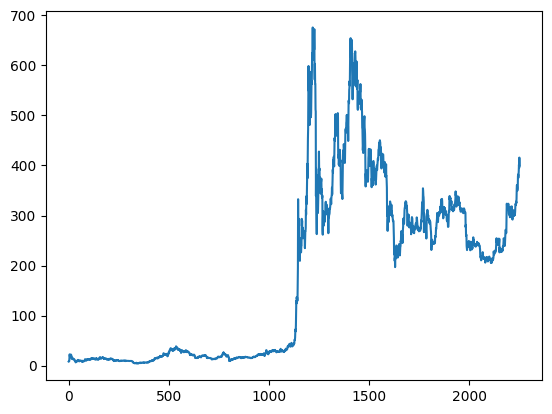

In [4]:
import matplotlib.pyplot as plt
plt.plot(Data)

In [5]:
import numpy as np
Data

0         8.414610
1         8.837770
2         9.535880
3         9.213990
4        14.917200
           ...    
2246    388.551727
2247    401.643890
2248    394.995636
2249    415.771606
2250    399.778717
Name: Close, Length: 2251, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
Data = scalar.fit_transform(np.array(Data).reshape(-1,1))
print(Data)

[[0.00578996]
 [0.00642045]
 [0.00746061]
 ...
 [0.58178325]
 [0.61273877]
 [0.58890988]]


In [7]:
training_size = int(len(Data)*0.75)
test_size = len(Data)-training_size
train_data, test_data = Data[0:training_size,:], Data[training_size:len(Data),:1]
training_size, test_size

(1688, 563)

In [8]:
train_data

array([[0.00578996],
       [0.00642045],
       [0.00746061],
       ...,
       [0.47580856],
       [0.46704231],
       [0.46987424]])

In [9]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX), numpy.array(dataY) 

In [10]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [11]:
print(X_train.shape), print(Y_train.shape)

(1587, 100)
(1587,)


(None, None)

In [12]:
print(X_test.shape), print(Y_test.shape)

(462, 100)
(462,)


(None, None)

In [13]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\91636\Desktop\project\my_kernal\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=100,batch_size = 64, verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0484 - val_loss: 0.0014
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0021 - val_loss: 7.9450e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0015 - val_loss: 6.5127e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0017 - val_loss: 7.8896e-04
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 

In [18]:
import tensorflow as tf
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [19]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [20]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

242.8644724859601

In [21]:
math.sqrt(mean_squared_error(Y_test, test_predict))

283.7153812017885

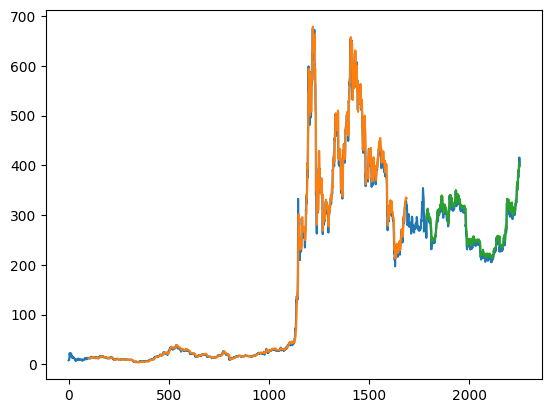

In [22]:
look_back = 100
trainPredictPlot = numpy.empty_like(Data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(Data)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Data)-1,:] = test_predict
plt.plot(scalar.inverse_transform(Data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
len(test_data)

563

In [24]:
x_input = test_data[463:].reshape(1,-1)
x_input.shape

(1, 100)

In [25]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [26]:
temp_input

[0.3450883893017497,
 0.3415559899692505,
 0.34026738682493446,
 0.3425604264497706,
 0.33899531189371346,
 0.33210314239101624,
 0.3354875819585112,
 0.3319858521237447,
 0.3324940041608722,
 0.33377810611238556,
 0.3349033342845685,
 0.33311144533804504,
 0.3408549526572259,
 0.3378244325973063,
 0.3350874436489698,
 0.34038133509437196,
 0.3492295879980302,
 0.3475200212638672,
 0.350447143516526,
 0.3604116222067618,
 0.372441789311183,
 0.3693550900143799,
 0.3710207086575439,
 0.35814325048925477,
 0.35732753631352565,
 0.3498141083360851,
 0.35285385874668745,
 0.36967374496344685,
 0.3808040564290628,
 0.3974011373270089,
 0.3975947035172025,
 0.3976162573917751,
 0.3876724222057701,
 0.39118317677565934,
 0.43680580238528116,
 0.4755212768657142,
 0.4754045542761844,
 0.46092170196426274,
 0.465819889244374,
 0.4587715964429533,
 0.4617107010168697,
 0.458277108900759,
 0.46506758362942074,
 0.4754060546737853,
 0.4662431712241584,
 0.45185635180853306,
 0.44454960620805944,
 

In [27]:
from numpy import array
lst_output = []
n_steps = 100
i = 0
while (i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(1,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape (1, n_steps, 1)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}". format (i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
print(lst_output)

[0.60696524]
101
1 day input [0.34155599 0.34026739 0.34256043 0.33899531 0.33210314 0.33548758
 0.33198585 0.332494   0.33377811 0.33490333 0.33311145 0.34085495
 0.33782443 0.33508744 0.34038134 0.34922959 0.34752002 0.35044714
 0.36041162 0.37244179 0.36935509 0.37102071 0.35814325 0.35732754
 0.34981411 0.35285386 0.36967374 0.38080406 0.39740114 0.3975947
 0.39761626 0.38767242 0.39118318 0.4368058  0.47552128 0.47540455
 0.4609217  0.46581989 0.4587716  0.4617107  0.45827711 0.46506758
 0.47540605 0.46624317 0.45185635 0.44454961 0.44694825 0.44169717
 0.44783692 0.45320777 0.4352223  0.4435614  0.43882932 0.46641746
 0.46292944 0.45377974 0.46004876 0.46155001 0.46551324 0.46753707
 0.44834378 0.43786467 0.42994926 0.42820279 0.44369654 0.44892161
 0.44765631 0.45619739 0.45136204 0.44076589 0.44050489 0.44196367
 0.43985053 0.44729655 0.44151529 0.44428083 0.45161809 0.46836131
 0.47576704 0.47471154 0.47121557 0.48187938 0.47729566 0.4912682
 0.52176016 0.53096751 0.51907419 0

8 day output [[0.6898382]]
1 day input [0.33377811 0.33490333 0.33311145 0.34085495 0.33782443 0.33508744
 0.34038134 0.34922959 0.34752002 0.35044714 0.36041162 0.37244179
 0.36935509 0.37102071 0.35814325 0.35732754 0.34981411 0.35285386
 0.36967374 0.38080406 0.39740114 0.3975947  0.39761626 0.38767242
 0.39118318 0.4368058  0.47552128 0.47540455 0.4609217  0.46581989
 0.4587716  0.4617107  0.45827711 0.46506758 0.47540605 0.46624317
 0.45185635 0.44454961 0.44694825 0.44169717 0.44783692 0.45320777
 0.4352223  0.4435614  0.43882932 0.46641746 0.46292944 0.45377974
 0.46004876 0.46155001 0.46551324 0.46753707 0.44834378 0.43786467
 0.42994926 0.42820279 0.44369654 0.44892161 0.44765631 0.45619739
 0.45136204 0.44076589 0.44050489 0.44196367 0.43985053 0.44729655
 0.44151529 0.44428083 0.45161809 0.46836131 0.47576704 0.47471154
 0.47121557 0.48187938 0.47729566 0.4912682  0.52176016 0.53096751
 0.51907419 0.51426435 0.51743371 0.52198828 0.55726089 0.56243472
 0.55246583 0.56203694 

16 day output [[0.7800843]]
1 day input [0.34752002 0.35044714 0.36041162 0.37244179 0.36935509 0.37102071
 0.35814325 0.35732754 0.34981411 0.35285386 0.36967374 0.38080406
 0.39740114 0.3975947  0.39761626 0.38767242 0.39118318 0.4368058
 0.47552128 0.47540455 0.4609217  0.46581989 0.4587716  0.4617107
 0.45827711 0.46506758 0.47540605 0.46624317 0.45185635 0.44454961
 0.44694825 0.44169717 0.44783692 0.45320777 0.4352223  0.4435614
 0.43882932 0.46641746 0.46292944 0.45377974 0.46004876 0.46155001
 0.46551324 0.46753707 0.44834378 0.43786467 0.42994926 0.42820279
 0.44369654 0.44892161 0.44765631 0.45619739 0.45136204 0.44076589
 0.44050489 0.44196367 0.43985053 0.44729655 0.44151529 0.44428083
 0.45161809 0.46836131 0.47576704 0.47471154 0.47121557 0.48187938
 0.47729566 0.4912682  0.52176016 0.53096751 0.51907419 0.51426435
 0.51743371 0.52198828 0.55726089 0.56243472 0.55246583 0.56203694
 0.57218203 0.59168893 0.58178325 0.61273877 0.58890988 0.60696524
 0.61363876 0.62395799 0.

24 day output [[0.8579241]]
1 day input [0.34981411 0.35285386 0.36967374 0.38080406 0.39740114 0.3975947
 0.39761626 0.38767242 0.39118318 0.4368058  0.47552128 0.47540455
 0.4609217  0.46581989 0.4587716  0.4617107  0.45827711 0.46506758
 0.47540605 0.46624317 0.45185635 0.44454961 0.44694825 0.44169717
 0.44783692 0.45320777 0.4352223  0.4435614  0.43882932 0.46641746
 0.46292944 0.45377974 0.46004876 0.46155001 0.46551324 0.46753707
 0.44834378 0.43786467 0.42994926 0.42820279 0.44369654 0.44892161
 0.44765631 0.45619739 0.45136204 0.44076589 0.44050489 0.44196367
 0.43985053 0.44729655 0.44151529 0.44428083 0.45161809 0.46836131
 0.47576704 0.47471154 0.47121557 0.48187938 0.47729566 0.4912682
 0.52176016 0.53096751 0.51907419 0.51426435 0.51743371 0.52198828
 0.55726089 0.56243472 0.55246583 0.56203694 0.57218203 0.59168893
 0.58178325 0.61273877 0.58890988 0.60696524 0.61363876 0.62395799
 0.63527125 0.64667213 0.65777034 0.66854113 0.67915905 0.68983817
 0.70072651 0.71187031 0

In [28]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
print(day_pred)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130]


In [29]:
import matplotlib.pyplot as plt
len(Data)

2251

In [30]:
df3 = Data.tolist()
df3.extend(lst_output)

In [31]:
print(scalar.inverse_transform(lst_output))

[[411.89667042]
 [416.37563616]
 [423.3014454 ]
 [430.89440104]
 [438.54616252]
 [445.9947838 ]
 [453.2236632 ]
 [460.34993239]
 [467.51728567]
 [474.82505292]
 [482.30427724]
 [489.92699584]
 [497.63260269]
 [505.35317102]
 [513.02977498]
 [520.61821017]
 [528.08647339]
 [535.40932215]
 [542.56239401]
 [549.51948636]
 [556.25187635]
 [562.72896094]
 [568.92009707]
 [574.79592182]
 [580.32907247]
 [585.49474654]
 [590.27190196]
 [594.64129679]
 [598.58788955]
 [602.09995906]]


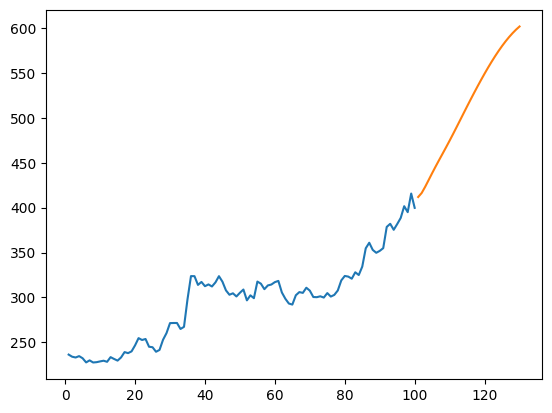

In [32]:
plt.plot(day_new,scalar.inverse_transform(Data[2151:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

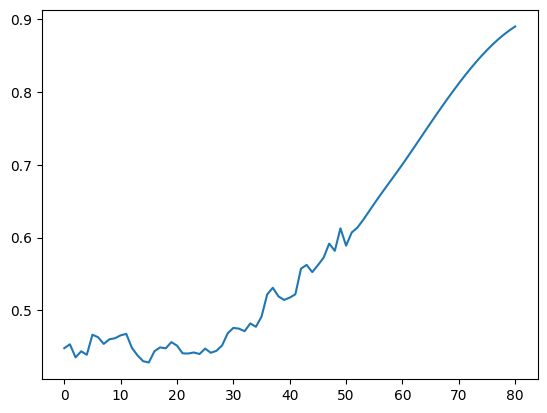

In [33]:
df3=Data.tolist()
df3.extend(lst_output)
plt.plot(df3[2200:])

In [34]:
df3=scalar.inverse_transform(df3).tolist()

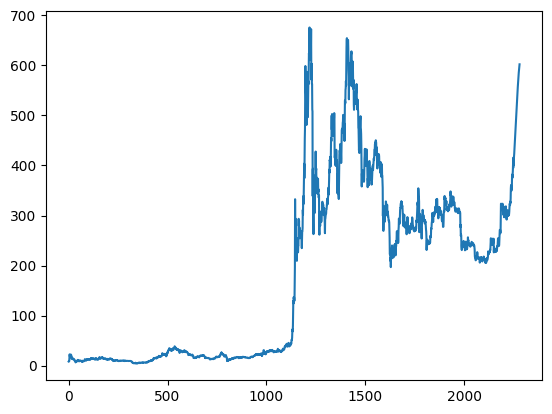

In [35]:
plt.plot(df3)